In [ ]:
#3bi) SGD-m with exponential tuning for OLS

method MSE= 1.959589599741021e-05


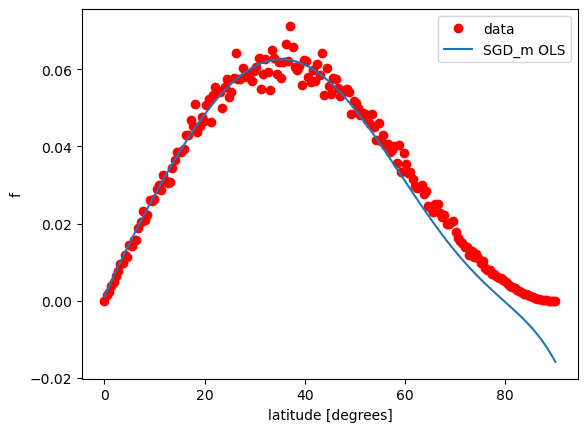

method MSE= 4.12483918177905e-05


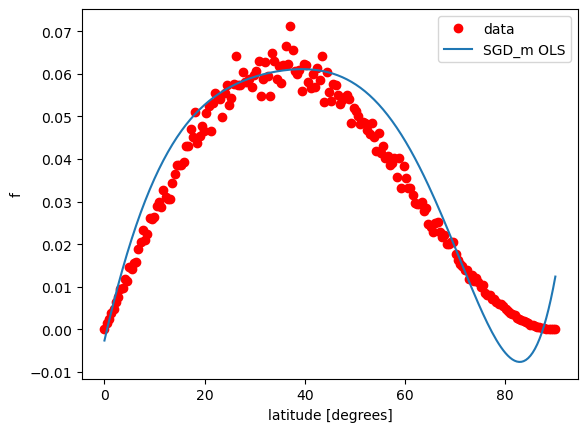

method MSE= 3.586677658299198e-05


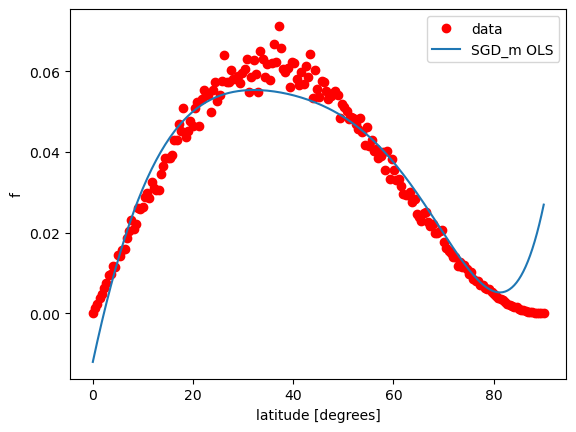

execution time= 5.221366882324219e-05 s


In [1]:
# Importing various packages
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from math import exp, sqrt
from random import random, seed
import matplotlib.pyplot as plt
from random import random, seed
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def learning_schedule(epoch, gamma_0):
    return gamma_0*np.exp(-epoch*gamma_0/100)

n_epochs = 1000 
gamma_0=0.001

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

for M in [1, 2, 16, 32, 64]: # we vary the size of each minibatch 
                       
    m = int(n/M) #number of minibatches

    beta_OLS_m = np.random.randn(degree+1,1)

    Niterations=1000

    for epoch in range(n_epochs):

        for i in range(m):
            random_index = M*np.random.randint(m)
            xi = X[random_index:random_index+M]
            yi = y_noisy[random_index:random_index+M]        

            gamma_OLS_m = learning_schedule(epoch, gamma_0)                                                   
            change_OLS = 0.0
            delta_momentum = 0.3    

            for iter in range(Niterations):

                # calculate gradient
                gradient_OLS_m = (2.0/M)* xi.T @ ((xi @ beta_OLS_m)-yi)
                
                # calculate update
                new_change_OLS = gamma_OLS_m*gradient_OLS_m+delta_momentum*change_OLS

                # take a step
                beta_OLS_m -= new_change_OLS

                # save the change
                change_OLS = new_change_OLS

                #print(gamma)
                beta_OLS_m = beta_OLS_m - gamma_OLS_m*gradient_OLS_m

    y_OLS_SGD_m = X @ beta_OLS_m

    MSE_OLS_SGD_m = MSE (y_OLS_SGD_m, y_noisy)
    print('method MSE=', MSE_OLS_SGD_m)

    plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
    plt.plot(x*180/np.pi, y_OLS_SGD_m, label='SGD_m OLS')
    plt.xlabel('latitude [degrees]')
    plt.ylabel('f')
    plt.legend()
    plt.show()
    
#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#3bii) SGD-m with exponential tuning for Ridge

number of minibatches: 32
(array([3]),)
method MSE= 4.6898538620364256e-05


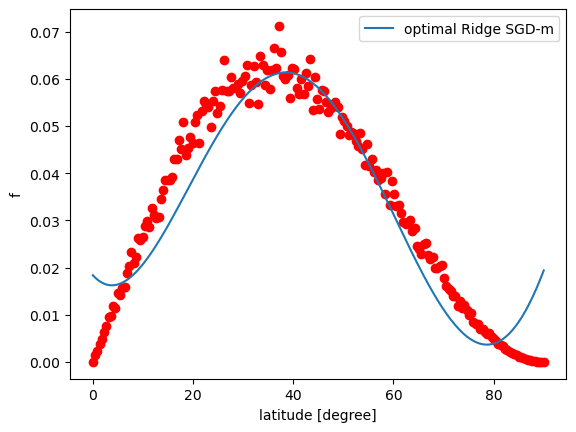

[8.82921230e-04 2.00630940e-03 7.80884798e-05 4.68985386e-05
 6.90985261e-04 9.03719910e-04 2.19185306e-04 9.28052498e-03]


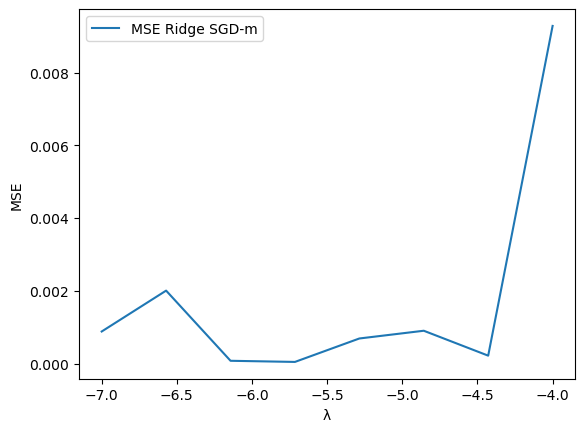

number of minibatches: 64
(array([1]),)
method MSE= 4.659096255103695e-05


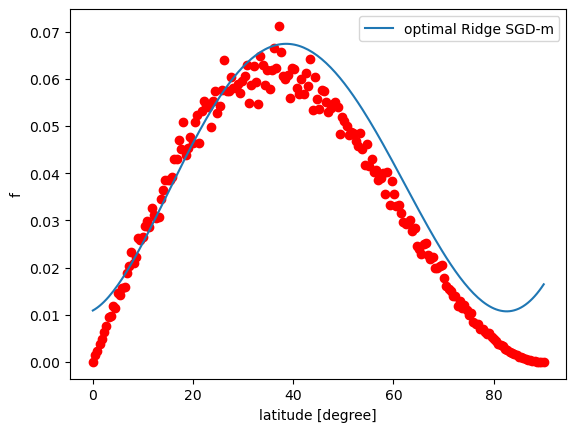

[2.05012976e-04 4.65909626e-05 2.40746910e-04 1.70040809e-03
 1.72884725e-03 1.98175033e-04 5.19979176e-05 9.22319350e-04]


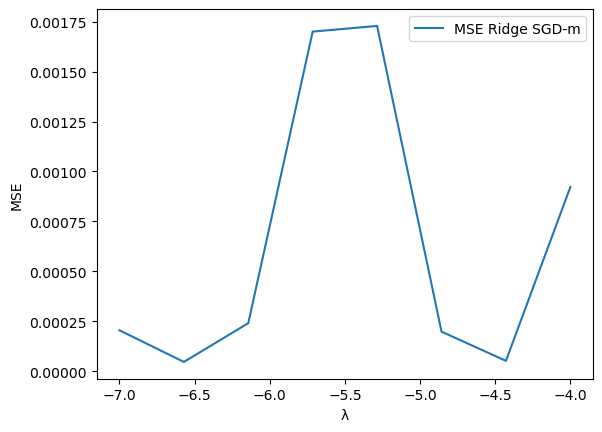

number of minibatches: 128
(array([5]),)
method MSE= 0.0007645530533403392


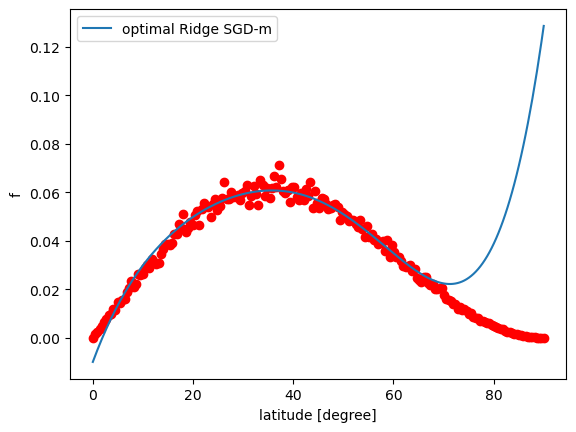

[9.83214491e-02 3.20819349e+00 2.33447732e-01 1.30807198e-02
 4.64085454e-01 7.64553053e-04 1.60292437e-02 2.50714303e-01]


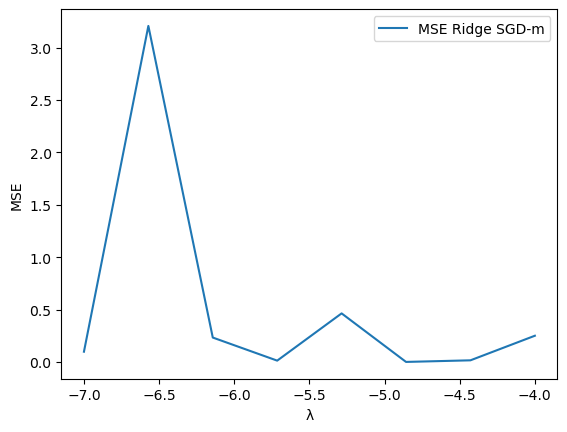

In [3]:
#Ridge parameter
nlambdas = 8 
lambdas = np.logspace(-7, -4, nlambdas) 

#leaning rate constants
n_epochs = 1000
gamma_0=0.001
Niterations=1000

for M in [32, 64, 128]:#we vary the size of each minibatch
    print('number of minibatches:', M)
    
    m = int(n/M) #number of minibatches
    
    y_Ridge_SGD_m_array= np.zeros(nlambdas, dtype=object)
    MSE_Ridge_SGD_m = np.zeros(nlambdas)

    for l in range(nlambdas):
        lmbda = lambdas[l]
        beta_Ridge_m = np.random.randn(degree+1,1)    

        for epoch in range(n_epochs):
            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]

                gamma_Ridge_m = learning_schedule(epoch, gamma_0) 

# Now improve with momentum gradient descent    
            change_Ridge = 0.0
            delta_momentum = 0.3

            for iter in range(Niterations):
                # calculate gradient       
                gradient_Ridge_m = (2.0/M)*xi.T @ (xi @ (beta_Ridge_m)-yi)+2*lmbda*beta_Ridge_m

                # calculate update       
                new_change_Ridge = gamma_Ridge_m*gradient_Ridge_m+delta_momentum*change_Ridge

                # take a step        
                beta_Ridge_m -= new_change_Ridge

                # save the change        
                change_Ridge = new_change_Ridge

            beta_Ridge_m = beta_Ridge_m - gamma_Ridge_m*gradient_Ridge_m

        y_Ridge_SGD_m = X @ beta_Ridge_m
        
        y_Ridge_SGD_m_array [l] = y_Ridge_SGD_m

        MSE_Ridge_SGD_m[l]=MSE(y_noisy, y_Ridge_SGD_m)    

    #finding the minimum value of the MSE
    MSE_Ridge_SGD_m_optimal = np.min(MSE_Ridge_SGD_m)
    conditon = (MSE_Ridge_SGD_m == MSE_Ridge_SGD_m_optimal)
    #the l, g for which we have the minimum MSE
    result = np.where(conditon)
    print(result)

    #saving the y that gives the optimal MSE
    y_Ridge_SGD_m_optimal= y_Ridge_SGD_m_array[result]
    y_Ridge_SGD_m_optimal=(y_Ridge_SGD_m_optimal[0])

    print('method MSE=', MSE_Ridge_SGD_m_optimal)

    plt.plot(x*180/np.pi, y_noisy, 'ro')
    plt.plot(x*180/np.pi, y_Ridge_SGD_m_optimal, label = 'optimal Ridge SGD-m')
    plt.xlabel('latitude [degree]')
    plt.ylabel('f')
    plt.legend()
    plt.show()    

    print(MSE_Ridge_SGD_m)
    plt.plot(np.log10(lambdas), MSE_Ridge_SGD_m, label ='MSE Ridge SGD-m')
    plt.xlabel('λ')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()  